In [ ]:
import pandas as pd
data=pd.read_csv('train.csv')

In [ ]:

new_data = []
for index, row in data.iterrows():
    tweet = row['Post']
    labels = row['Labels Set'].split(',')  # Assuming labels are comma-separated
    for label in labels:
        new_data.append([tweet, label.strip()])

new_df = pd.DataFrame(new_data, columns=['tweets', 'label'])


In [ ]:
new_df.head()

,tweets,label
0,मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्क...,hate
1,मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्क...,offensive
2,सरकार हमेशा से किसानों की कमाई को बढ़ाने के लि...,non-hostile
3,"सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील...",non-hostile
4,@prabhav218 साले जेएनयू छाप कमिने लोग हिन्दुओं...,defamation


In [ ]:
new_df

,tweets,label
0,मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्क...,hate
1,मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्क...,offensive
2,सरकार हमेशा से किसानों की कमाई को बढ़ाने के लि...,non-hostile
3,"सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील...",non-hostile
4,@prabhav218 साले जेएनयू छाप कमिने लोग हिन्दुओं...,defamation
...,...,...
6287,उदितराज जी हिम्मत जुटा कर उस नेता के लिए कुछ ...,hate
6288,उप्र: पीएम रिपोर्ट में खुलासा: हार्टअटैक से हु...,non-hostile
6289,नौकरी गंवा चुके दोस्त की मदद: नगद के बजाए गिफ्...,non-hostile
6290,बंगाल में हिन्दू मरे हैं इसलिए मुझे कोई फर्क न...,fake


In [ ]:
new_df.to_csv('new_dataset.csv',index=True)

In [ ]:
df=pd.read_csv('new_dataset.csv')
df.head()

,Unnamed: 0,tweets,label
0,0,मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्क...,hate
1,1,मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्क...,offensive
2,2,सरकार हमेशा से किसानों की कमाई को बढ़ाने के लि...,non-hostile
3,3,"सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील...",non-hostile
4,4,@prabhav218 साले जेएनयू छाप कमिने लोग हिन्दुओं...,defamation


<Axes: xlabel='label', ylabel='count'>

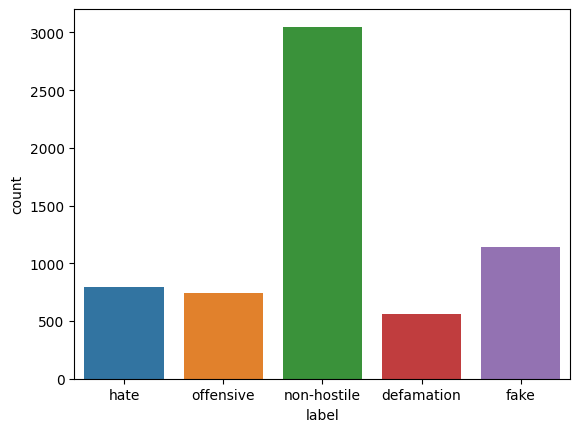

In [ ]:
import seaborn as sns
sns.countplot(data=df,x='label')

In [ ]:
import pandas as pd
import random


# Create empty dataframes for each class
class_hate = pd.DataFrame(columns=['tweets','label'])
class_offensive = pd.DataFrame(columns=['tweets','label'])
class_non_hostile = pd.DataFrame(columns=['tweets','label'])
class_defamation=pd.DataFrame(columns=['tweets','label'])
class_fake=pd.DataFrame(columns=['tweets','label'])

# Split the dataset into separate dataframes based on class
for index, row in df.iterrows():
    tweet_label = row['label']
    tweet_text = row['tweets']
    if tweet_label == 'hate':
        class_hate = class_hate.append({'label': tweet_label, 'tweets': tweet_text}, ignore_index=True)
    elif tweet_label == 'offensive':
        class_offensive = class_offensive.append({'label': tweet_label, 'tweets': tweet_text}, ignore_index=True)
    elif tweet_label == 'non-hostile':
        class_non_hostile = class_non_hostile.append({'label': tweet_label, 'tweets': tweet_text}, ignore_index=True)
    elif tweet_label == 'defamation':
        class_defamation = class_defamation.append({'label': tweet_label, 'tweets': tweet_text}, ignore_index=True)
    elif tweet_label == 'fake':
        class_fake = class_fake.append({'label': tweet_label, 'tweets': tweet_text}, ignore_index=True)

# Randomly sample 1000 tweets from each class
sampled_class_0 = class_hate.sample(n=500, random_state=1)
sampled_class_1 = class_offensive.sample(n=500, random_state=1)
sampled_class_2 = class_non_hostile.sample(n=500, random_state=1)
sampled_class_3 = class_defamation.sample(n=500, random_state=1)
sampled_class_4 = class_fake.sample(n=500, random_state=1)

# Concatenate the sampled dataframes to create the final balanced dataset
balanced_dataset = pd.concat([sampled_class_0, sampled_class_1, sampled_class_2, sampled_class_3,sampled_class_4])

# Shuffle the final dataset to mix the classes
balanced_dataset = balanced_dataset.sample(frac=1, random_state=1)

# Save the balanced dataset to a new CSV file
# Replace 'balanced_dataset.csv' with the desired filename for the balanced dataset
balanced_dataset.to_csv('balanced_dataset.csv', index=False)


C:\Users\shree\AppData\Local\Temp\ipykernel_18208\1708391896.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  class_hate = class_hate.append({'label': tweet_label, 'tweets': tweet_text}, ignore_index=True)
C:\Users\shree\AppData\Local\Temp\ipykernel_18208\1708391896.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  class_offensive = class_offensive.append({'label': tweet_label, 'tweets': tweet_text}, ignore_index=True)
C:\Users\shree\AppData\Local\Temp\ipykernel_18208\1708391896.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  class_non_hostile = class_non_hostile.append({'label': tweet_label, 'tweets': tweet_text}, ignore_index=True)
C:\Users\shree\AppData\Local\Temp\ipykernel_18208\1708391896.py:21: FutureWarni

In [ ]:
final=pd.read_csv('balanced_dataset.csv')
final

,tweets,label
0,सोनाली के पिता किसान हैं. सोनाली ने अमेरिका के...,non-hostile
1,RT @aadhiIa: देशभक्तों से भरी सेना को लद्दाख़ ...,hate
2,28वें ओवर में राशिद ने झटके दो विकेट. पहले कैर...,non-hostile
3,"यह कश्मीर या केरल नहीं है।""इस्लाम जिंदाबाद"" का...",fake
4,@AAPDelhi @DrKumarVishwas जिस तरह एक केजरी ...,hate
...,...,...
2495,RT @Komal_433: बैश्यओं के साथ भेदभाव क्यों कुछ...,offensive
2496,हैप्पी बड्डे कमीने 🎂\n@Dharm_yadav_01 🎂\nभगवान...,offensive
2497,"#Kasganj घरेलू झगड़े में युवक ने लगाई फांसी, प...",non-hostile
2498,पहले दूध का रंग भगवा होता था। हमारी धार्मिक भा...,hate


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the tweets data to get TF-IDF vectors
tfidf_vectors = tfidf_vectorizer.fit_transform(final['tweets'])

# Create a DataFrame with TF-IDF vectors and labels
tfidf_df = pd.DataFrame(tfidf_vectors.toarray(), columns=tfidf_vectorizer.get_feature_names_out(), index=final.index)
tfidf_df['Labels'] = final['label']

# Save the TF-IDF vectors along with labels to a CSV file
tfidf_df.to_csv('tfidf_embeddings_final.csv', index=True)


In [ ]:
import pandas as pd
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize


tokenized_tweets = final['tweets'].apply(word_tokenize)

# Train the Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_tweets, vector_size=100, window=5, min_count=1, workers=4)

# Create word embeddings for each tweet
def get_tweet_vector(tweet):
    # Tokenize the tweet
    tokens = word_tokenize(tweet)
    # Get the word vectors for each token and take the mean
    vectors = [word2vec_model.wv[token] for token in tokens if token in word2vec_model.wv]
    if vectors:
        return sum(vectors) / len(vectors)
    else:
        # If no valid tokens are found, return a vector of zeros
        return [0] * 100

# Apply the function to each tweet and create a new DataFrame
embedding_df = pd.DataFrame(final['tweets'].apply(get_tweet_vector).tolist())

# Concatenate the class labels with the embeddings DataFrame
embedding_df['Labels'] = final['label']

# Save the embeddings to a CSV file
embedding_df.to_csv('word2vec_embeddings_final.csv', index=False)


<Axes: xlabel='label', ylabel='count'>

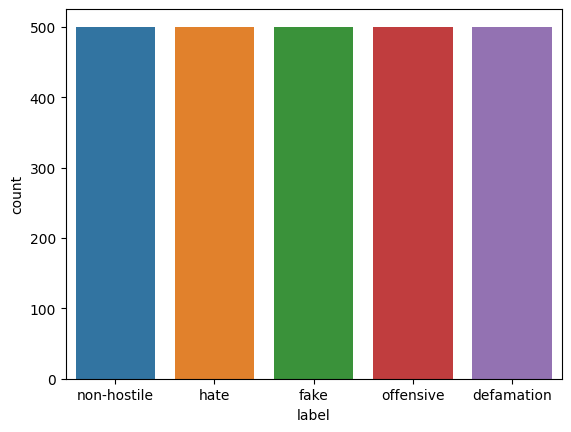

In [ ]:
sns.countplot(data=final,x='label')